## Part I: Preprocessing and EDA

In [46]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [47]:
df=pd.read_csv("Orders.csv")

In [48]:
pd.set_option('display.max_columns', 100)

In [49]:
display(df)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.00,$62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.10,-$288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.10,$919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.10,-$96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.00,$311.52,903.040,Critical
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,New South Wales,Australia,Oceania,Asia Pacific,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID","$2,862.68",5,0.10,$763.28,897.350,Critical
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,Wellington,New Zealand,Oceania,Asia Pacific,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable","$1,822.08",4,0.00,$564.84,894.770,Critical
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,Waikato,New Zealand,Oceania,Asia Pacific,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled","$5,244.84",6,0.00,$996.48,878.380,High
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",$341.96,2,0.00,$54.71,25.270,High
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,United States,Western US,USCA,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",$48.71,1,0.20,$5.48,11.130,High


In [50]:
df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

# Problem #1

In [51]:
df.Profit=list(map(lambda x: float(re.sub('[,\$]','',x)), df.Profit))

In [52]:
df.Sales=list(map(lambda x: float(re.sub('[,\$]','',x)), df.Sales))

# Problem #2 

In [456]:
df['Ship.Date']=pd.to_datetime(df['Ship.Date'])

In [457]:
df['Order.Date']=pd.to_datetime(df['Order.Date'])

In [458]:
df['Month']=list(map(lambda x: x.month, df['Order.Date']))

In [459]:
df['Year']=list(map(lambda x: x.year, df['Order.Date']))

In [460]:
group_dates=df.groupby(['Year', 'Month'])

### Is there any seasonal trend of inventory in the company?

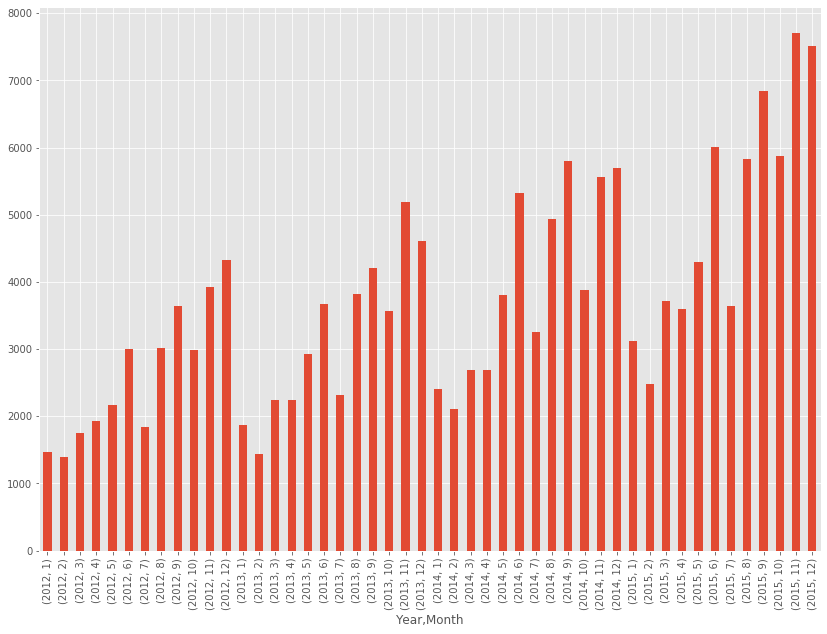

In [461]:
plt.figure(figsize=(14,10))
group_dates['Quantity'].sum().plot.bar()

### Is the seasonal trend the same for different categories? 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128da1518>,
      dtype=object)

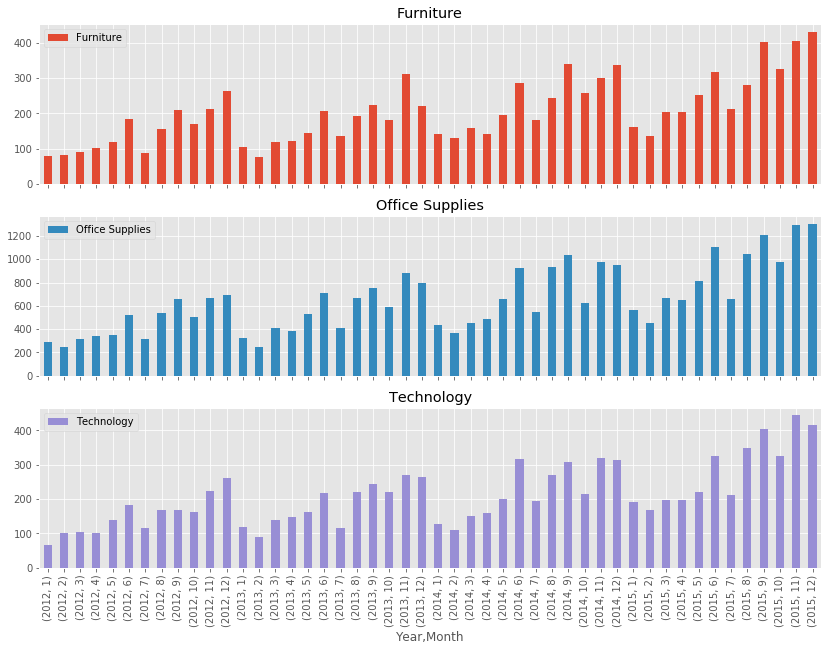

In [462]:
df.groupby(['Year', 'Month', 'Category']).size().sort_values().unstack().plot.bar(subplots=True,figsize=(14,10))

# Problem #3

In [463]:
df2=pd.read_csv("Returns.csv")

In [464]:
df2=df2.rename(columns={'Order ID': 'Order.ID'})

In [465]:
df2.columns

Index(['Returned', 'Order.ID', 'Region'], dtype='object')

In [466]:
df3=pd.merge(df, df2, how="outer", on="Order.ID")

In [467]:
df3['Returned']=df3['Returned'].fillna('No')

### Profits lost each year due to returns

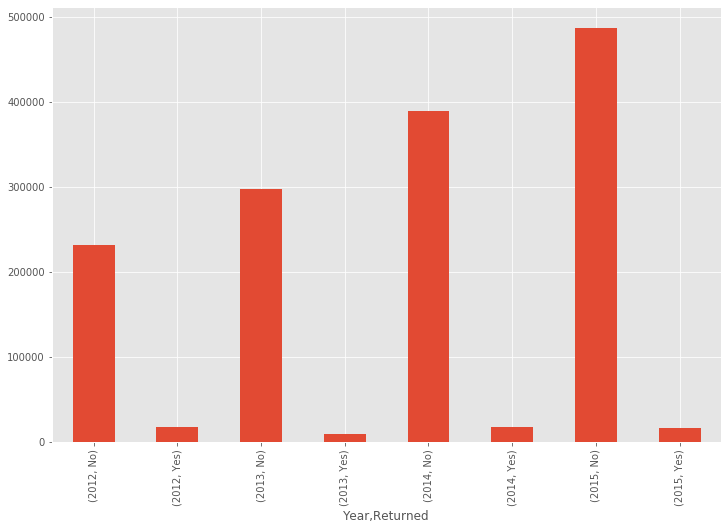

In [468]:
df3.groupby(['Year', 'Returned'])['Profit'].sum().plot.bar(figsize=(12,8))

### How many customer returned more than once? more than 5 times?

In [469]:
return_count=df3.groupby(['Returned', 'Order.ID']).size().sort_values(ascending=False)
return_count.Yes

Order.ID
MX-2015-PO1885082-42279     13
IN-2013-JK1609027-41615     11
MX-2015-MY1829582-42321     10
IN-2014-TB2140066-41873     10
CA-2013-SG20080140-41578     9
CA-2015-KH16510140-42347     9
NI-2012-SN1056095-41065      8
US-2013-HD1478598-41583      8
ES-2014-JP1552045-41871      8
IN-2012-PB19210127-41259     8
MX-2014-AJ1096031-41801      8
ID-2015-JE1561097-42193      7
CA-2014-EH13765140-41997     7
ES-2015-AT1073545-42367      7
ES-2015-BT1139564-42088      7
MX-2014-BM1114055-41961      7
US-2014-GT14710140-41980     7
US-2014-GK14620101-41744     7
US-2014-SC20230140-41873     7
US-2015-DH13075140-42092     7
MX-2013-ES1408018-41619      7
US-2014-DL12925101-41646     7
US-2015-TC2114555-42166      7
TU-2012-CS1845134-41235      7
ES-2014-PO1885048-41898      6
ES-2015-BB1154548-42336      6
MX-2015-DG1330093-42319      6
MX-2014-LS1697518-41666      6
ID-2013-SC2080059-41380      6
CA-2014-NS18505140-41968     6
                            ..
ES-2015-CJ1201064-42323      1

In [470]:
times_5=0
times_2=0

for order in return_count.Yes:
    if order>=5:
        times_5+=1
        
    if order>=2:
        times_2+=1
    else:
        times+=1

print('Return more than 5 times: %s' %times_5)
print('Return more than once: %s' %times_2)

Return more than 5 times: 73
Return more than once: 551


### Which regions are more likely to return orders?

In [471]:
df3.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Month', 'Year',
       'Returned', 'Region_y'],
      dtype='object')

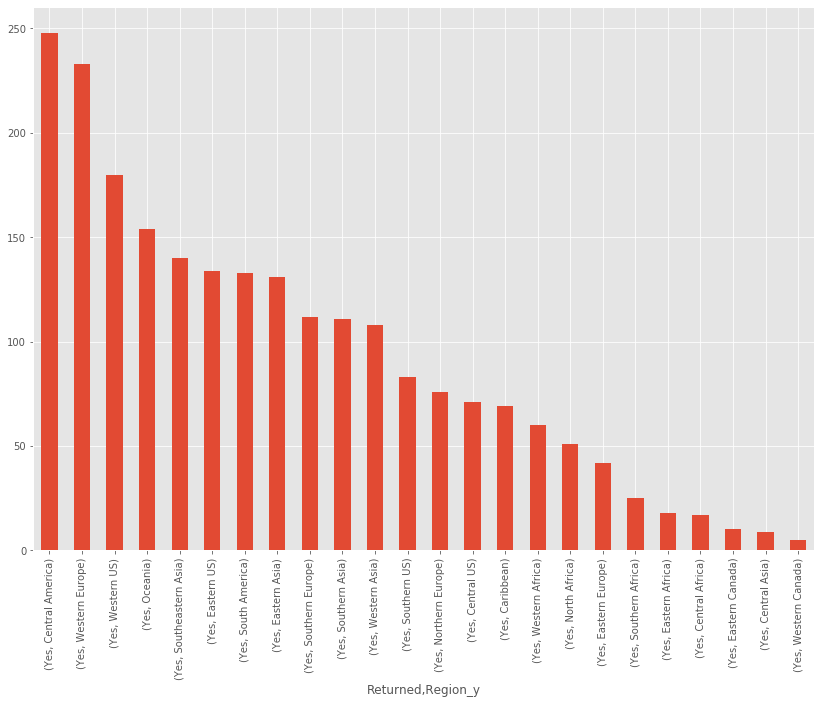

In [472]:
df3.groupby(['Returned', 'Region_y']).size().sort_values(ascending=False).plot.bar(figsize=(14,10))

### Which categories (sub-categories) of products are more likely to be returned?

In [473]:
df3.groupby(['Returned','Sub.Category']).size().sort_values(ascending=False)

Returned  Sub.Category
No        Binders         5877
          Storage         4837
          Art             4647
          Paper           3342
          Chairs          3287
          Phones          3212
          Furnishings     3019
          Accessories     2937
          Fasteners       2499
          Labels          2464
          Bookcases       2307
          Supplies        2304
          Envelopes       2288
          Copiers         2124
          Appliances      1683
          Machines        1423
          Tables           820
Yes       Binders          269
          Art              217
          Storage          212
          Paper            150
          Chairs           147
          Phones           145
          Accessories      138
          Labels           137
          Furnishings      135
          Bookcases        104
          Supplies         103
          Fasteners        102
          Envelopes         99
          Copiers           99
          Machin

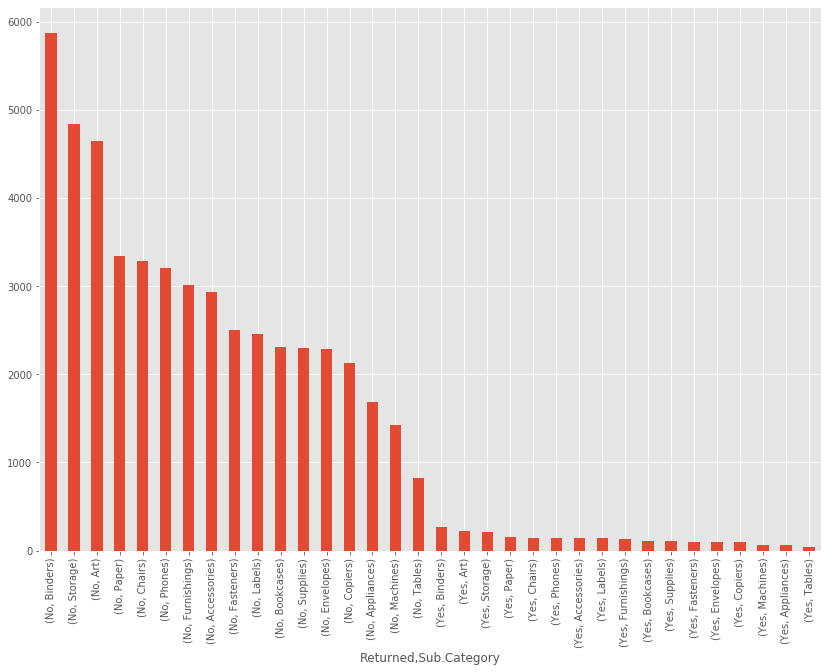

In [474]:
df3.groupby(['Returned','Sub.Category']).size().sort_values(ascending=False).plot.bar(figsize=(14,10))

# Part II: Machine Learning and Business Use Case

# Problem #4

In [475]:
df3['Returned']=df3['Returned'].fillna('No')

In [476]:
df3['Process.Time']=df3['Ship.Date']-df3['Order.Date']

In [477]:
return_group=df3.groupby(['Returned', 'Product.ID']).size()

In [478]:
df_test=pd.DataFrame(return_group.Yes)
df_test=df_test.reset_index()
df_test=df_test.rename(columns={0:'Num.Returns'})

In [479]:
df4=pd.merge(df3, df_test, how="outer", on="Product.ID")

In [489]:
sum(df4['Num.Returns'].isnull())

0

In [487]:
df4['Num.Returns']=df4['Num.Returns'].fillna(0)

# Problem #5 